In [1]:
import matplotlib.pyplot as plt
import numpy as np
from quippy.potential import Potential
from ase import Atoms
#?Potential

In [2]:
?Potential

In [13]:
#gap_soapglue = Potential(args_str = 'IP GAP', param_filename='GAP_glue_soap.xml')
gluePotential = Potential(args_str = 'IP Glue',param_filename='Potentials/SiH_pairpot.xml')

In [2]:
modsoap = Potential("xml_label=GAP_2020_10_23_-420_15_37_43_513", param_filename='Potentials/GAP_glue_soap_v4/GAP_glue_soap_v4.xml')

In [47]:
gap_soapglue = Potential('IP GAP', param_filename='Potentials/GAP_glue_soap_v2.xml')

In [2]:
gp_iter6 = Potential('IP GAP', param_filename='gp_iter6_sparse9k.xml')

In [19]:
glue2b = Potential('IP GAP', param_filename='GAP_2bglue_oldstructures.xml')

In [76]:
glue3b = Potential('IP GAP', param_filename='Potentials/GAP_glue_3b_modified.xml')

In [4]:
isolated_atom = Atoms("Si", positions=[[0,0,0]])
isolated_atom.set_calculator(modsoap)
E0Si = isolated_atom.get_potential_energy()
print(E0Si)

isolated_atom = Atoms("H", positions=[[0,0,0]])
isolated_atom.set_calculator(modsoap)
E0H = isolated_atom.get_potential_energy()
print(E0H)

-102.42257199265066
-12.618153826912577


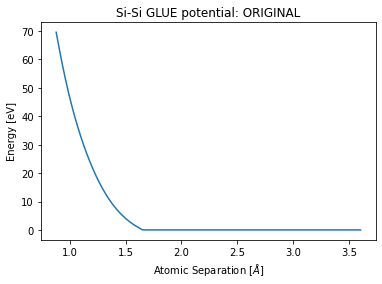

In [15]:
dimers = [Atoms("2Si", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.88,3.6,100)]
glue_dimer_curve = []
for dim in dimers:
    dim.set_calculator(gluePotential)
    glue_dimer_curve.append(dim.get_potential_energy())
plt.plot([dim.positions[1,0] for dim in dimers], np.array(glue_dimer_curve))
plt.title("Si-Si GLUE potential: ORIGINAL")
plt.ylabel("Energy [eV]")
plt.xlabel(r"Atomic Separation [$\AA$]")
plt.show()

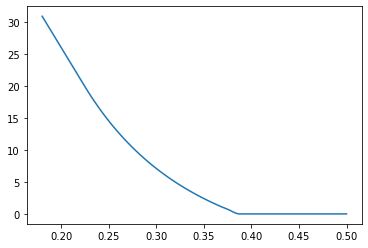

In [11]:
dimers = [Atoms("2H", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.18,0.5,100)]
dimer_curve = []
for dim in dimers:
    dim.set_calculator(gluePotential)
    dimer_curve.append(dim.get_potential_energy())
plt.plot([dim.positions[1,0] for dim in dimers], np.array(dimer_curve))
plt.show()

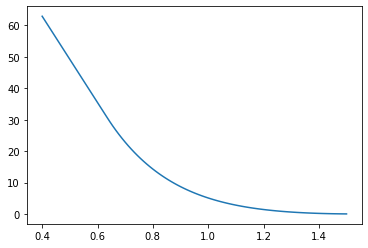

In [104]:
dimers = [Atoms("SiH", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.4,1.5,100)]
dimer_curve = []
for dim in dimers:
    dim.set_calculator(gluePotential)
    dimer_curve.append(dim.get_potential_energy())
plt.plot([dim.positions[1,0] for dim in dimers], np.array(dimer_curve))
plt.show()

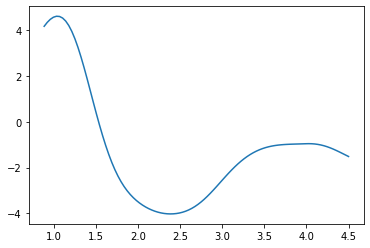

In [19]:
dimers = [Atoms("2Si", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.88,4.5,100)]
dimer_curve = []
for dim in dimers:
    dim.set_calculator(gp_iter6)
    dimer_curve.append(dim.get_potential_energy())
plt.plot([dim.positions[1,0] for dim in dimers], np.array(dimer_curve)/2 + 156.54)
plt.show()

# 2 Si atoms

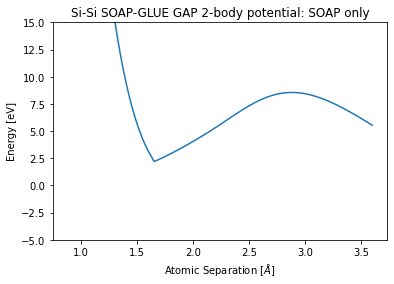

In [5]:
dimers = [Atoms("2Si", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.88,3.6,100)]
dimer_curve = []
for dim in dimers:
    dim.set_calculator(modsoap)
    pot = dim.get_potential_energy()
    dimer_curve.append(pot)
plt.plot([dim.positions[1,0] for dim in dimers], np.array(dimer_curve)-2*E0Si)
plt.ylim(-5,15)
plt.title("Si-Si SOAP-GLUE GAP 2-body potential: SOAP only")
plt.ylabel("Energy [eV]")
plt.xlabel(r"Atomic Separation [$\AA$]")
plt.show()

# 

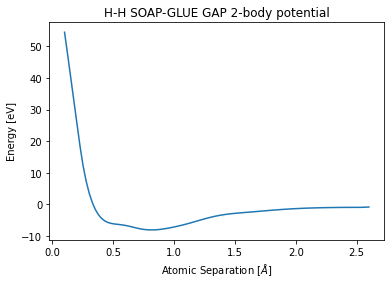

In [105]:
dimers = [Atoms("2H", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.1,2.6,100)]
dimer_curve = []
for dim in dimers:
    dim.set_calculator(modsoap)
    pot = dim.get_potential_energy()
    dim.set_calculator(gluePotential)
    pot += dim.get_potential_energy()
    dimer_curve.append(pot)
    
    
plt.plot([dim.positions[1,0] for dim in dimers], (np.array(dimer_curve)) - 2*E0H)
plt.title("H-H SOAP-GLUE GAP 2-body potential")
plt.ylabel("Energy [eV]")
plt.xlabel(r"Atomic Separation [$\AA$]")
plt.show()

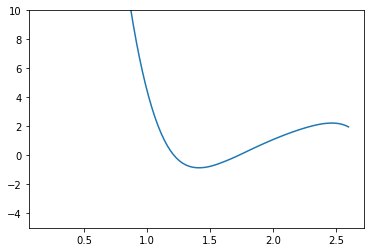

In [111]:
dimers = [Atoms("SiH", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.18,2.6,100)]
dimer_curve = []
for dim in dimers:
    dim.set_calculator(modsoap)
    pot = dim.get_potential_energy()
    dim.set_calculator(gluePotential)
    pot += dim.get_potential_energy()
    dimer_curve.append(pot)
plt.ylim(-5,10)
plt.plot([dim.positions[1,0] for dim in dimers], (np.array(dimer_curve))-E0H - E0Si)
plt.show()

In [74]:
from quippy import descriptors
?descriptors

In [7]:
glue3bSOAP = Potential('IP GAP', param_filename='Potentials/GAP_soap_3b_openmp.xml')

In [8]:
isolated_atom = Atoms("Si", positions=[[0,0,0]])
isolated_atom.set_calculator(glue3bSOAP)
E0Si = isolated_atom.get_potential_energy()
print(E0Si)

isolated_atom = Atoms("H", positions=[[0,0,0]])
isolated_atom.set_calculator(glue3bSOAP)
E0H = isolated_atom.get_potential_energy()
print(E0H)

-102.42257203736868
-12.61815688134758


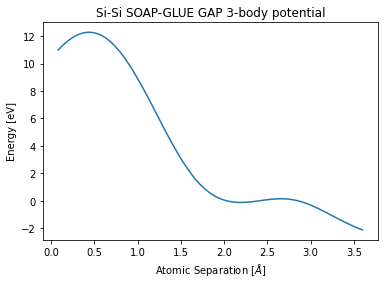

In [12]:
dimers = [Atoms("2Si", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.08,3.6,100)]
dimer_curve = []
for dim in dimers:
    dim.set_calculator(glue3bSOAP)
    pot = dim.get_potential_energy()
    dimer_curve.append(pot)
plt.plot([dim.positions[1,0] for dim in dimers], np.array(dimer_curve)-2*E0Si)
plt.title("Si-Si SOAP-GLUE GAP 3-body potential")
plt.ylabel("Energy [eV]")
plt.xlabel(r"Atomic Separation [$\AA$]")
plt.show()

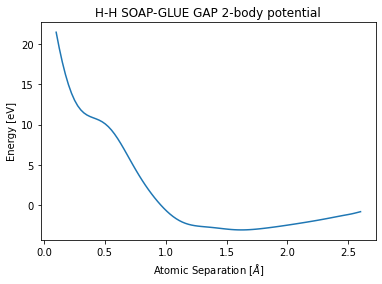

In [10]:
dimers = [Atoms("2H", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.1,2.6,100)]
dimer_curve = []
for dim in dimers:
    dim.set_calculator(glue3bSOAP)
    pot = dim.get_potential_energy()
    dimer_curve.append(pot)
    
    
plt.plot([dim.positions[1,0] for dim in dimers], (np.array(dimer_curve)) - 2*E0H)
plt.title("H-H SOAP-GLUE GAP 2-body potential")
plt.ylabel("Energy [eV]")
plt.xlabel(r"Atomic Separation [$\AA$]")
plt.show()

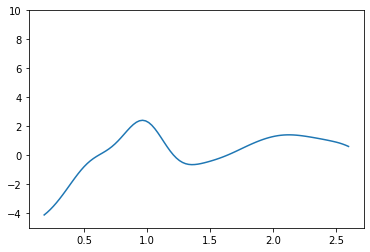

In [11]:
dimers = [Atoms("SiH", positions=[[0,0,0], [x, 0,0]]) for x in np.linspace(0.18,2.6,100)]
dimer_curve = []
for dim in dimers:
    dim.set_calculator(glue3bSOAP)
    pot = dim.get_potential_energy()
    dimer_curve.append(pot)
plt.ylim(-5,10)
plt.plot([dim.positions[1,0] for dim in dimers], (np.array(dimer_curve))-E0H - E0Si)
plt.show()